<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 4 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

Tarea 4: Granovetter
-------------------------
### Descripción
Se establecen N agentes, cada agente tiene un umbral que representa la cantidad de gente que debe ver protestando para unirse a la protesta
....
### Simulacion
...
Umbral vs adherencia
adherencia vs Varianza

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test(tamaño, Umbral):
    Agents=np.random.randint(0,100,tamaño)
    adhesion=0
    retraccion=0
    for i in range(len(Agents)):
        if Agents[i]>Umbral:
            retraccion+=1
        if Agents[i]<=Umbral:
            adhesion+=1
    if np.ceil((adhesion/len(Agents))*100)<1:
        Umbral=np.ceil((adhesion/len(Agents))*100)
    else:
        Umbral=adhesion
        #print(Umbral, adhesion,retraccion)
    return adhesion

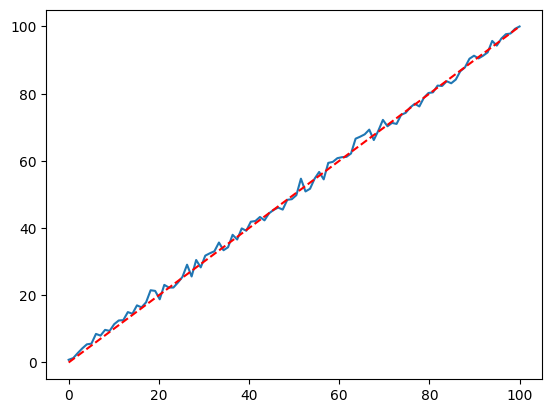

In [3]:
wa=np.linspace(0,100,100)
lista=[]
for elem in range(len(wa)):
    asd=test(1000,wa[elem])
    lista.append(asd/10)
plt.plot(wa,lista)
plt.plot(wa,wa, 'r--')

In [14]:
def test2(tamaño, media, std,  Umbral):
    Agents=np.ceil(np.abs(np.random.normal(media,std,tamaño))*100)
    adhesion=0
    retraccion=0
    for i in range(len(Agents)):
        if Agents[i]>Umbral:
            retraccion+=1
        if Agents[i]<=Umbral:
            adhesion+=1
    if np.ceil((adhesion/len(Agents))*100)<1:
        Umbral=np.ceil((adhesion/len(Agents))*100)
    else:
        Umbral=adhesion
        #print(Umbral, adhesion,retraccion)
    return adhesion

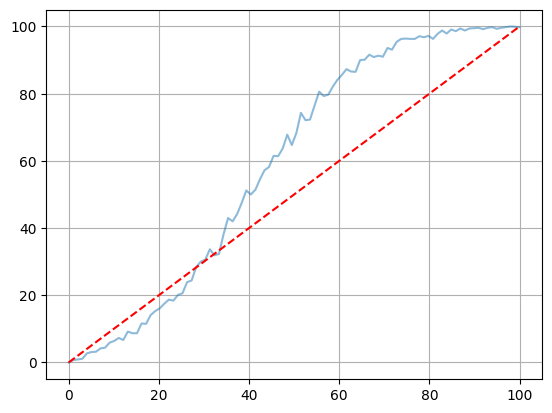

In [17]:
wa=np.linspace(0,100,100)
lista=[]
for elem in range(len(wa)):
    asd=test2(1000,0.4, 0.2, wa[elem])
    lista.append(asd/10)
plt.plot(wa,lista, markersize=5, alpha=0.5)
plt.plot(wa,wa, 'r--')
plt.grid(True)
plt.savefig('test4.png')

In [25]:
Agents=np.random.randint(0,100,100)
Umbral=5
ciclos=100
for a in range(ciclos):
    adhesion=0
    retraccion=0
    for i in range(len(Agents)):
        if Agents[i]>Umbral:
            retraccion+=1
        if Agents[i]<=Umbral:
            adhesion+=1
    if np.ceil((adhesion/len(Agents))*100)<1:
        Umbral=np.ceil((adhesion/len(Agents))*100)
    else:
        Umbral=adhesion
    print(Umbral, adhesion,retraccion)

6 6 94
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
7 7 93
